<a href="https://colab.research.google.com/github/umangjpatel/g20-machine-learning/blob/main/Sipakmed%20Dataset%20Analysis%20and%20Fastai%20Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing PyTorch 1.7 and fastai
Fastai requires Pytorch 1.7 :|


Will have to restart runtime if installing for the first time.

In [1]:
!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 torchtext==0.8.1
! [ -e /content ] && pip install -Uqq fastai
! pip install kaggle

     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
     |████████████████████████████████| 7.6MB 42.4MB/s 
     |████████████████████████████████| 7.0MB 46.6MB/s 
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1
     |████████████████████████████████| 194kB 19.8MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 


# Downloading the dataset from Kaggle (uploaded dataset for easier access)

In [2]:
from google.colab import files
from pathlib import Path
kaggle_key = (Path(".")) / "kaggle.json"
if not kaggle_key.exists():
  uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets list --user=umangjpatel

ref                                          title                             size  lastUpdated          downloadCount  
-------------------------------------------  -------------------------------  -----  -------------------  -------------  
umangjpatel/ham10000-imagenet-style-dataset  HAM10000 ImageNet-style dataset    3GB  2020-04-10 11:11:15             12  
umangjpatel/smiling-faces                    Smiling Faces                    116MB  2020-05-19 17:07:37              5  
umangjpatel/sipakmed-wsi                     Sipakmed WSI                       6GB  2021-04-02 00:22:50              3  


In [4]:
!kaggle datasets download umangjpatel/sipakmed-wsi -p="dataset" --unzip

100% 6.01G/6.01G [02:09<00:00, 49.1MB/s]
100% 6.01G/6.01G [02:09<00:00, 49.7MB/s]


# Analyzing some images

In [5]:
dataset_path = Path(".") / "dataset"
print("Categories\t\t  | # of images")
print("-" * 40)
for d in dataset_path.iterdir():
  img_count = len([x for x in d.iterdir() if x.is_file() and x.suffix == ".bmp"])
  spaces = " " if "_" in d.name else "\t\t "
  print(f"{d.name}{spaces} | {img_count}")

Categories		  | # of images
----------------------------------------
dyskeratotic		  | 223
parabasal		  | 108
metaplastic		  | 271
koilocytotic		  | 238
superficial_intermediate  | 126


Above is category-wise frequency table of our dataset. Let's visualize some images from each category.

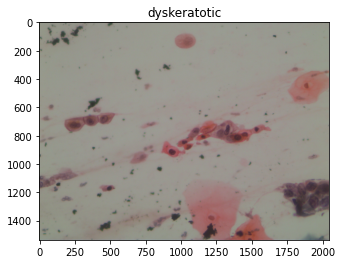

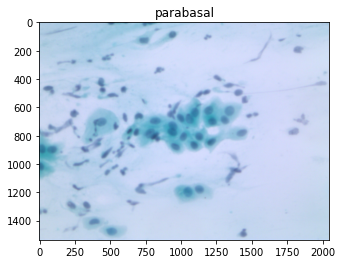

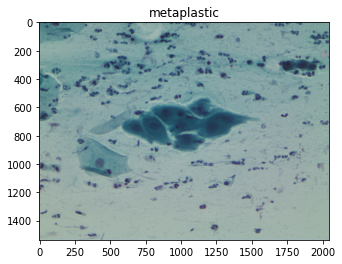

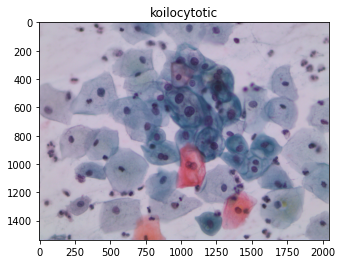

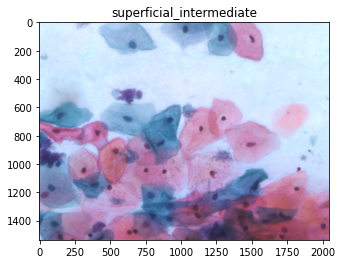

In [6]:
from fastai.vision.all import *
for d in dataset_path.iterdir():
  img, label = Image.open(get_image_files(d)[100]), d.name
  plt.imshow(np.asarray(img))
  plt.title(label)
  plt.show()

You can see the images are of high-resolution and therefore we have to take care of memory usage while training the models.

# Training a simple pretrained model using Fastai

Below code uses 64 images per batch by default. Reducing batch size will speed up training.

In [17]:
dls = ImageDataLoaders.from_folder(path=dataset_path, #Path where the images are stored
                                   valid_pct=0.2, #80% training, 20% for validation
                                   item_tfms=Resize(64), #resizing the images to lower resolution
                                   batch_tfms=None, #No data augmentation,
                                   bs=8,
                                   seed=0) #seed for getting the same validation set
dls

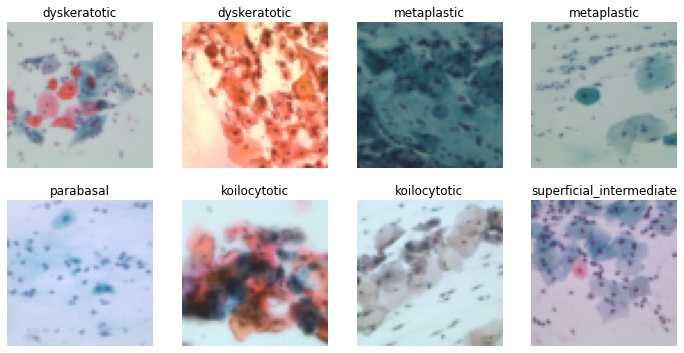

In [18]:
dls.show_batch()

Now let's train a ResNet-18 model using transfer learning.

In [19]:
models_dir = Path("models").mkdir(exist_ok=True)
learner = cnn_learner(dls=dls, arch=resnet18, #loading dataset and architecture
                      pretrained=True, # for using transfer learning
                      metrics=accuracy,  # metrics for tracking progress
                      model_dir=models_dir) # saving models at a particular directory

In [20]:
learner.fine_tune(epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,2.061883,1.366994,0.601036,03:22


epoch,train_loss,valid_loss,accuracy,time
0,1.555624,1.133831,0.658031,03:13
1,1.377337,0.975743,0.699482,03:04


The 1st epoch can be ignored. It simply trains and checks whether the new layer(classification layer) works or now.

The other two lines are the main stats that we are after.